In [1]:
# Base modules

from numpy import load
import numpy as np
from pathlib import Path

# Import os & glob
import os
import glob

# Import plot tools
import matplotlib
matplotlib.use('nbagg')
import matplotlib.pyplot as plt
import matplotlib.axes as axes
from mpl_toolkits import mplot3d

# Import data analysis tools
from scipy.signal import savgol_filter
from scipy import interpolate
import pandas as pd
from scipy.signal import find_peaks

import seaborn as sns
import matplotlib.gridspec as grid_spec

from statsmodels.graphics import tsaplots
import random

# Import timing
import time
import natsort
import itertools

from sklearn.utils import shuffle

import plotly.express as px
from tqdm.notebook import tqdm

%matplotlib widget

In [2]:
#  read file

df = pd.read_csv("/home/kkumari/PhD/fish-data/intrinsic-bias/4b30f45efe4d11ed957d003053fc769c.csv.gz")#, usecols=desired_cols)
data= df

In [3]:
data

,Unnamed: 0,current_trial,current_trial_new,orientation,interstim_start_frame,angle1,osg_y2,speed,stim_end_frame,angle2,...,z,framenumber,condition_name,length,framenumber0,uuid,obj_id,timezone,dt,start_time
0,0,-1.0,0.0,0.0,0.0,0.00,0.0,0.04,0.0,0.0,...,-0.064643,7635,animated,11404,7635,4b30f45efe4d11ed957d003053fc769c,4,CET,0.01,1.685384e+09
1,1,-1.0,0.0,0.0,0.0,0.00,0.0,0.04,0.0,0.0,...,-0.064670,7636,animated,11404,7635,4b30f45efe4d11ed957d003053fc769c,4,CET,0.01,1.685384e+09
2,2,-1.0,0.0,0.0,0.0,0.00,0.0,0.04,0.0,0.0,...,-0.064697,7637,animated,11404,7635,4b30f45efe4d11ed957d003053fc769c,4,CET,0.01,1.685384e+09
3,3,-1.0,0.0,0.0,0.0,0.00,0.0,0.04,0.0,0.0,...,-0.064724,7638,animated,11404,7635,4b30f45efe4d11ed957d003053fc769c,4,CET,0.01,1.685384e+09
4,4,-1.0,0.0,0.0,0.0,0.00,0.0,0.04,0.0,0.0,...,-0.064752,7639,animated,11404,7635,4b30f45efe4d11ed957d003053fc769c,4,CET,0.01,1.685384e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589804,589804,15.0,15.0,0.0,534000.0,1941.84,NaN,0.04,534000.0,-320.0,...,-0.015427,611776,animated,802,610979,4b30f45efe4d11ed957d003053fc769c,69,CET,0.01,1.685390e+09
589805,589805,15.0,15.0,0.0,534000.0,1941.84,NaN,0.04,534000.0,-320.0,...,-0.015427,611777,animated,802,610979,4b30f45efe4d11ed957d003053fc769c,69,CET,0.01,1.685390e+09
589806,589806,15.0,15.0,0.0,534000.0,1941.84,NaN,0.04,534000.0,-320.0,...,-0.015427,611778,animated,802,610979,4b30f45efe4d11ed957d003053fc769c,69,CET,0.01,1.685390e+09
589807,589807,15.0,15.0,0.0,534000.0,1941.84,NaN,0.04,534000.0,-320.0,...,-0.015427,611779,animated,802,610979,4b30f45efe4d11ed957d003053fc769c,69,CET,0.01,1.685390e+09


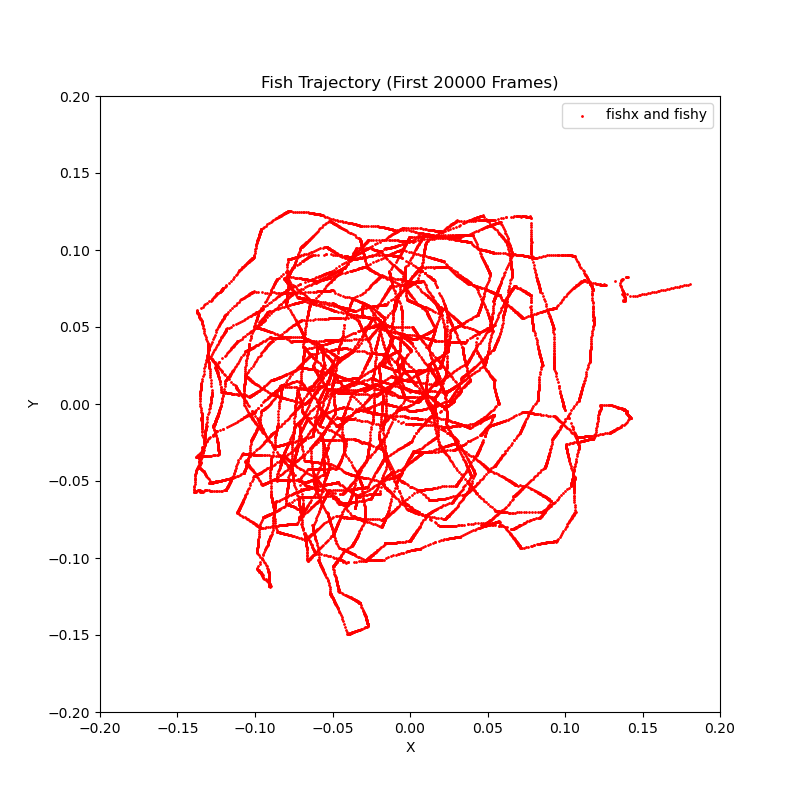

In [44]:
# Extract the required variables for the first 2000 frames
fishx1 = data['fishx'][:20000]
fishy1 = data['fishy'][:20000]

# Plotting the fish trajectory for the first 2000 frames
plt.figure(figsize=(8, 8))
plt.scatter(fishx1, fishy1, color='red', label='fishx and fishy', s=1)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-0.2, 0.2)  # Set x-axis limits
plt.ylim(-0.2, 0.2)  # Set y-axis limits
plt.title('Fish Trajectory (First 20000 Frames)')
plt.legend()
plt.show()

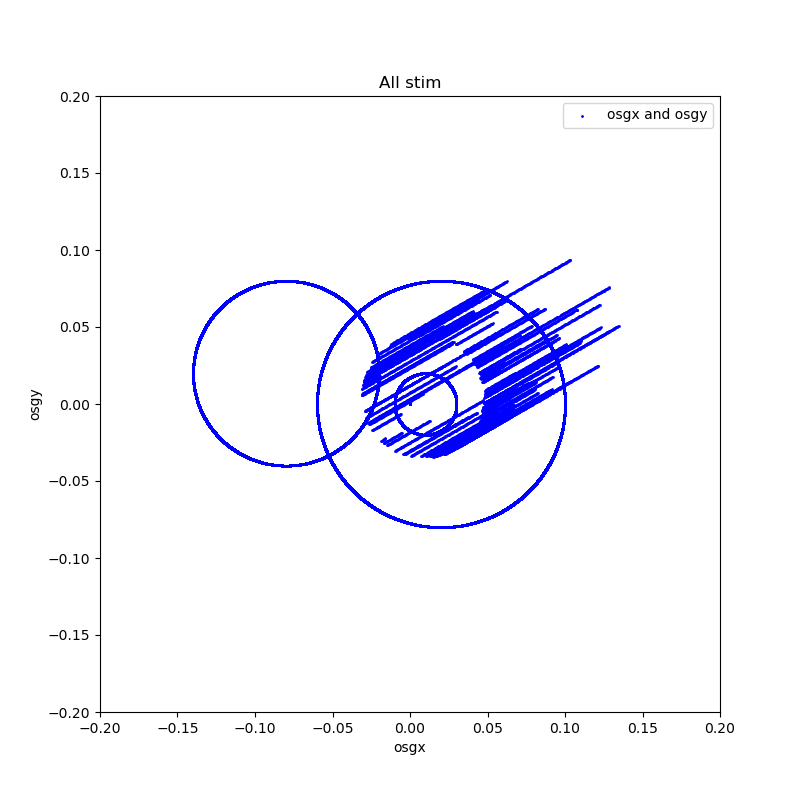

In [41]:
#  plot 

# Extract the required variables
osgx1 = data['osg_x1']
osgy1 = data['osg_y1']

# Plotting the variables
plt.figure(figsize=(8, 8))
plt.scatter(osgx1, osgy1, color='blue', label='osgx and osgy', s=1)
plt.xlabel('osgx')
plt.ylabel('osgy')
plt.xlim(-0.2, 0.2)  # Set x-axis limits
plt.ylim(-0.2, 0.2)  # Set y-axis limits
plt.title("All stim")
plt.legend()
plt.show()

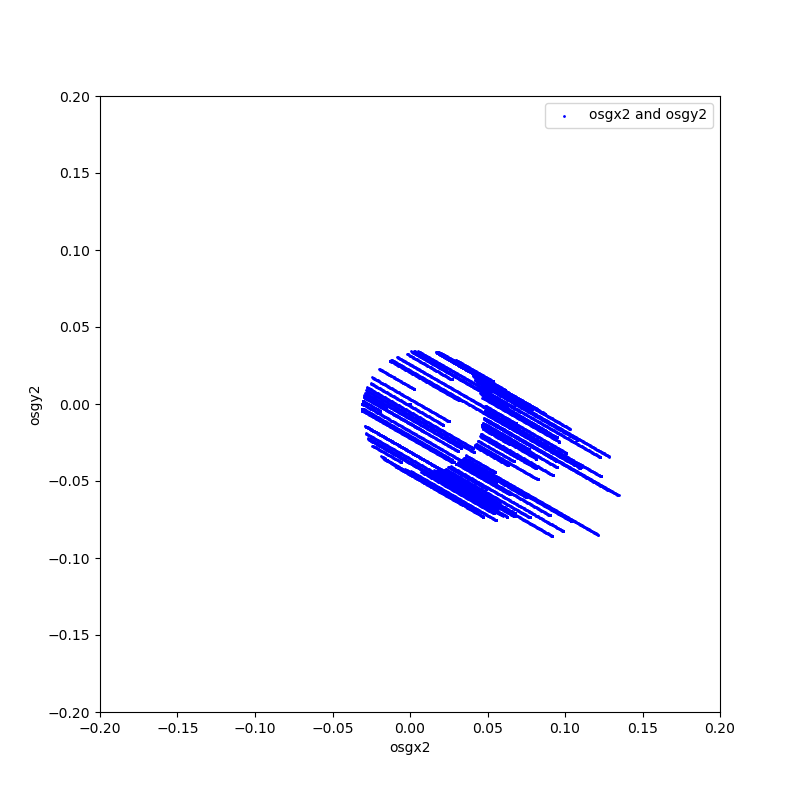

In [29]:
osgx2 = data['osg_x2']
osgy2 = data['osg_y2']

# Plotting the variables
plt.figure(figsize=(8, 8))
plt.scatter(osgx2, osgy2, color='blue', label='osgx2 and osgy2', s=1)
plt.xlabel('osgx2')
plt.ylabel('osgy2')
plt.xlim(-0.2, 0.2)  # Set x-axis limits
plt.ylim(-0.2, 0.2)  # Set y-axis limits
plt.legend()
plt.show()

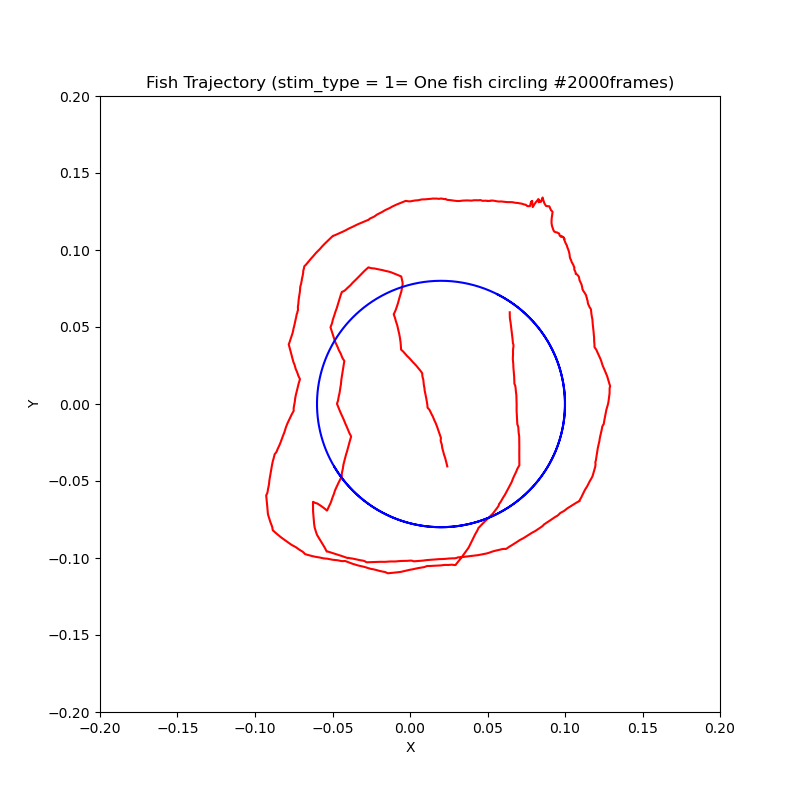

In [30]:
# Filter the data based on the condition
stim1_filtered_data = data[data['stim_type'] == 1][:2000]


# Extract the required variables
fishx = stim1_filtered_data['fishx']
fishy = stim1_filtered_data['fishy']
osgx1 = stim1_filtered_data['osg_x1']
osgy1 = stim1_filtered_data['osg_y1']
osgx2 = stim1_filtered_data['osg_x2']
osgy2 = stim1_filtered_data['osg_y2']


# Plotting the fish trajectory
plt.figure(figsize=(8, 8))
plt.plot(fishx, fishy, color='red')
plt.plot(osgx1, osgy1, color='blue')
plt.plot(osgx2, osgy2, color='green')
plt.xlim(-0.2, 0.2)  # Set x-axis limits
plt.ylim(-0.2, 0.2)  # Set y-axis limits
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fish Trajectory (stim_type = 1= One fish circling #2000frames)')
plt.show()

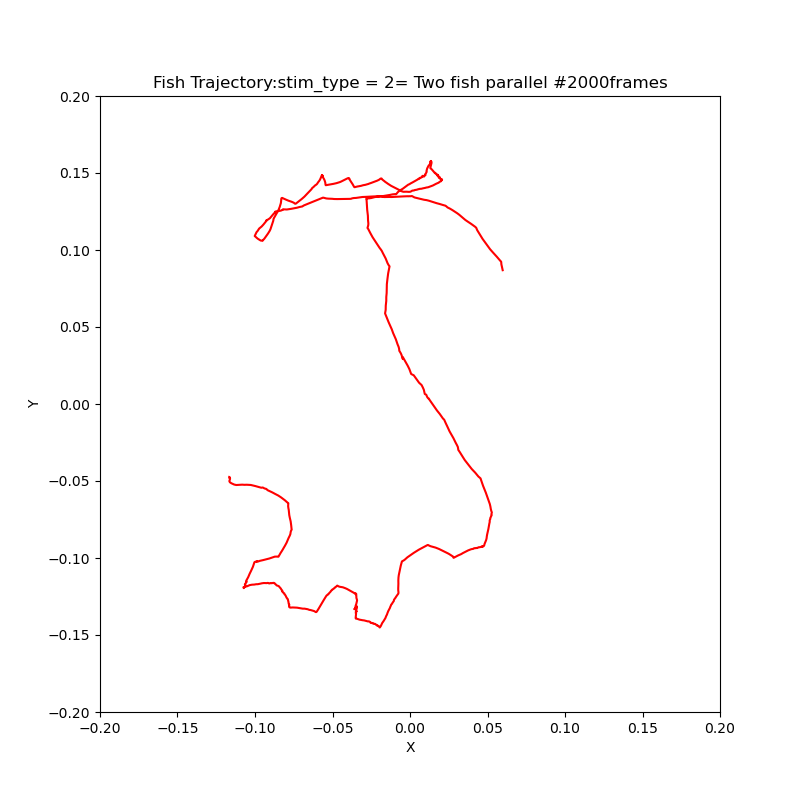

In [31]:
# Filter the data based on the condition
stim2_filtered_data = data[data['stim_type'] == 2][:2000]


# Extract the required variables
fishx = stim2_filtered_data['fishx']
fishy = stim2_filtered_data['fishy']
osgx1 = stim2_filtered_data['osg_x1']
osgy1 = stim2_filtered_data['osg_y1']
osgx2 = stim2_filtered_data['osg_x2']
osgy2 = stim2_filtered_data['osg_y2']

# Plotting the fish trajectory
plt.figure(figsize=(8, 8))
plt.plot(fishx, fishy, color='red')
plt.plot(osgx1, osgy1, color='blue')
plt.plot(osgx2, osgy2, color='green')
plt.xlim(-0.2, 0.2)  # Set x-axis limits
plt.ylim(-0.2, 0.2)  # Set y-axis limits
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fish Trajectory:stim_type = 2= Two fish parallel #2000frames')
plt.show()

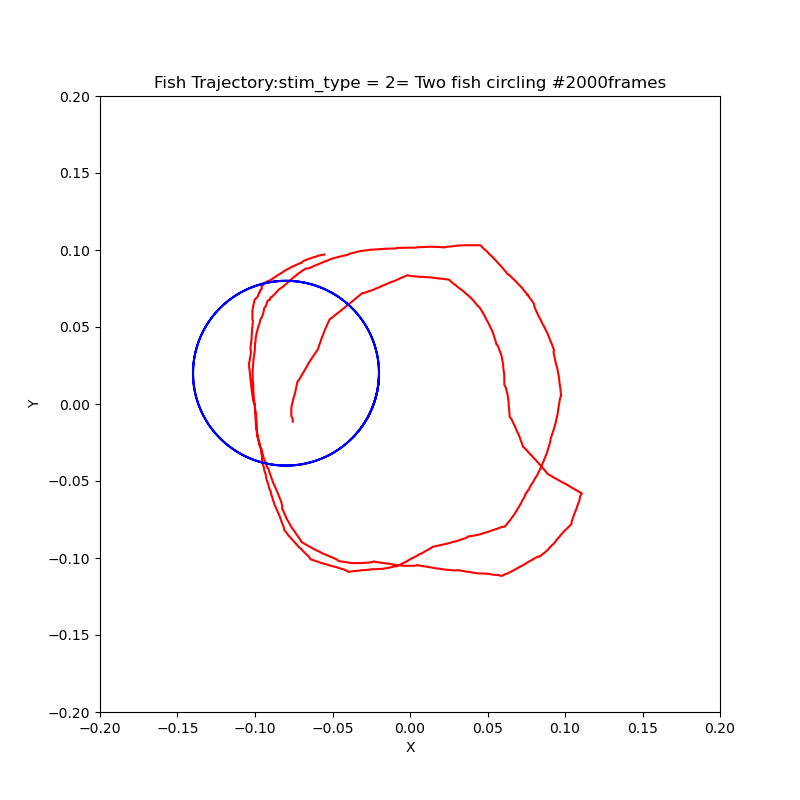

In [32]:
# Filter the data based on the condition
stim3_filtered_data = data[data['stim_type'] == 3][:2000]


# Extract the required variables
fishx = stim3_filtered_data['fishx']
fishy = stim3_filtered_data['fishy']

osgx1 = stim3_filtered_data['osg_x1']
osgy1 = stim3_filtered_data['osg_y1']
osgx2 = stim3_filtered_data['osg_x2']
osgy2 = stim3_filtered_data['osg_y2']

# Plotting the fish trajectory
plt.figure(figsize=(8, 8))
plt.plot(fishx, fishy, color='red')
plt.plot(osgx1, osgy1, color='blue')
plt.plot(osgx2, osgy2, color='green')
plt.xlim(-0.2, 0.2)  # Set x-axis limits
plt.ylim(-0.2, 0.2)  # Set y-axis limits
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fish Trajectory:stim_type = 2= Two fish circling #2000frames')
plt.show()

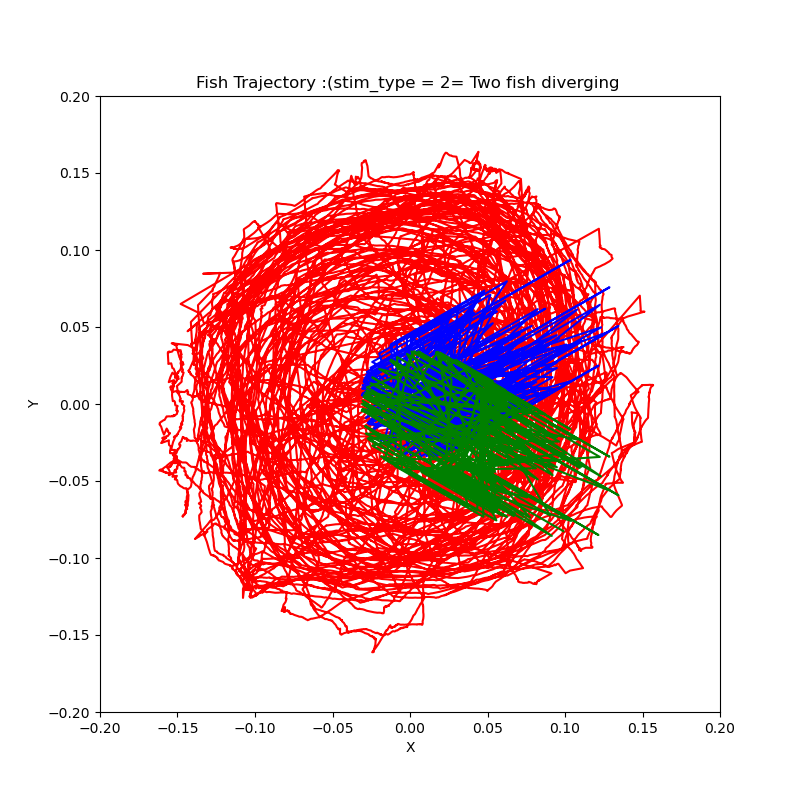

In [45]:
# Filter the data based on the condition
stim4_filtered_data = data[data['stim_type'] == 4]


# Extract the required variables
fishx = stim4_filtered_data['fishx']
fishy = stim4_filtered_data['fishy']

osgx1 = stim4_filtered_data['osg_x1']
osgy1 = stim4_filtered_data['osg_y1']
osgx2 = stim4_filtered_data['osg_x2']
osgy2 = stim4_filtered_data['osg_y2']

# Plotting the fish trajectory
plt.figure(figsize=(8, 8))
plt.plot(fishx, fishy, color='red')
plt.plot(osgx1, osgy1, color='blue')
plt.plot(osgx2, osgy2, color='green')
plt.xlim(-0.2, 0.2)  # Set x-axis limits
plt.ylim(-0.2, 0.2)  # Set y-axis limits
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Fish Trajectory :(stim_type = 2= Two fish diverging ')
plt.show()